In [1]:
import networkx as nx
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


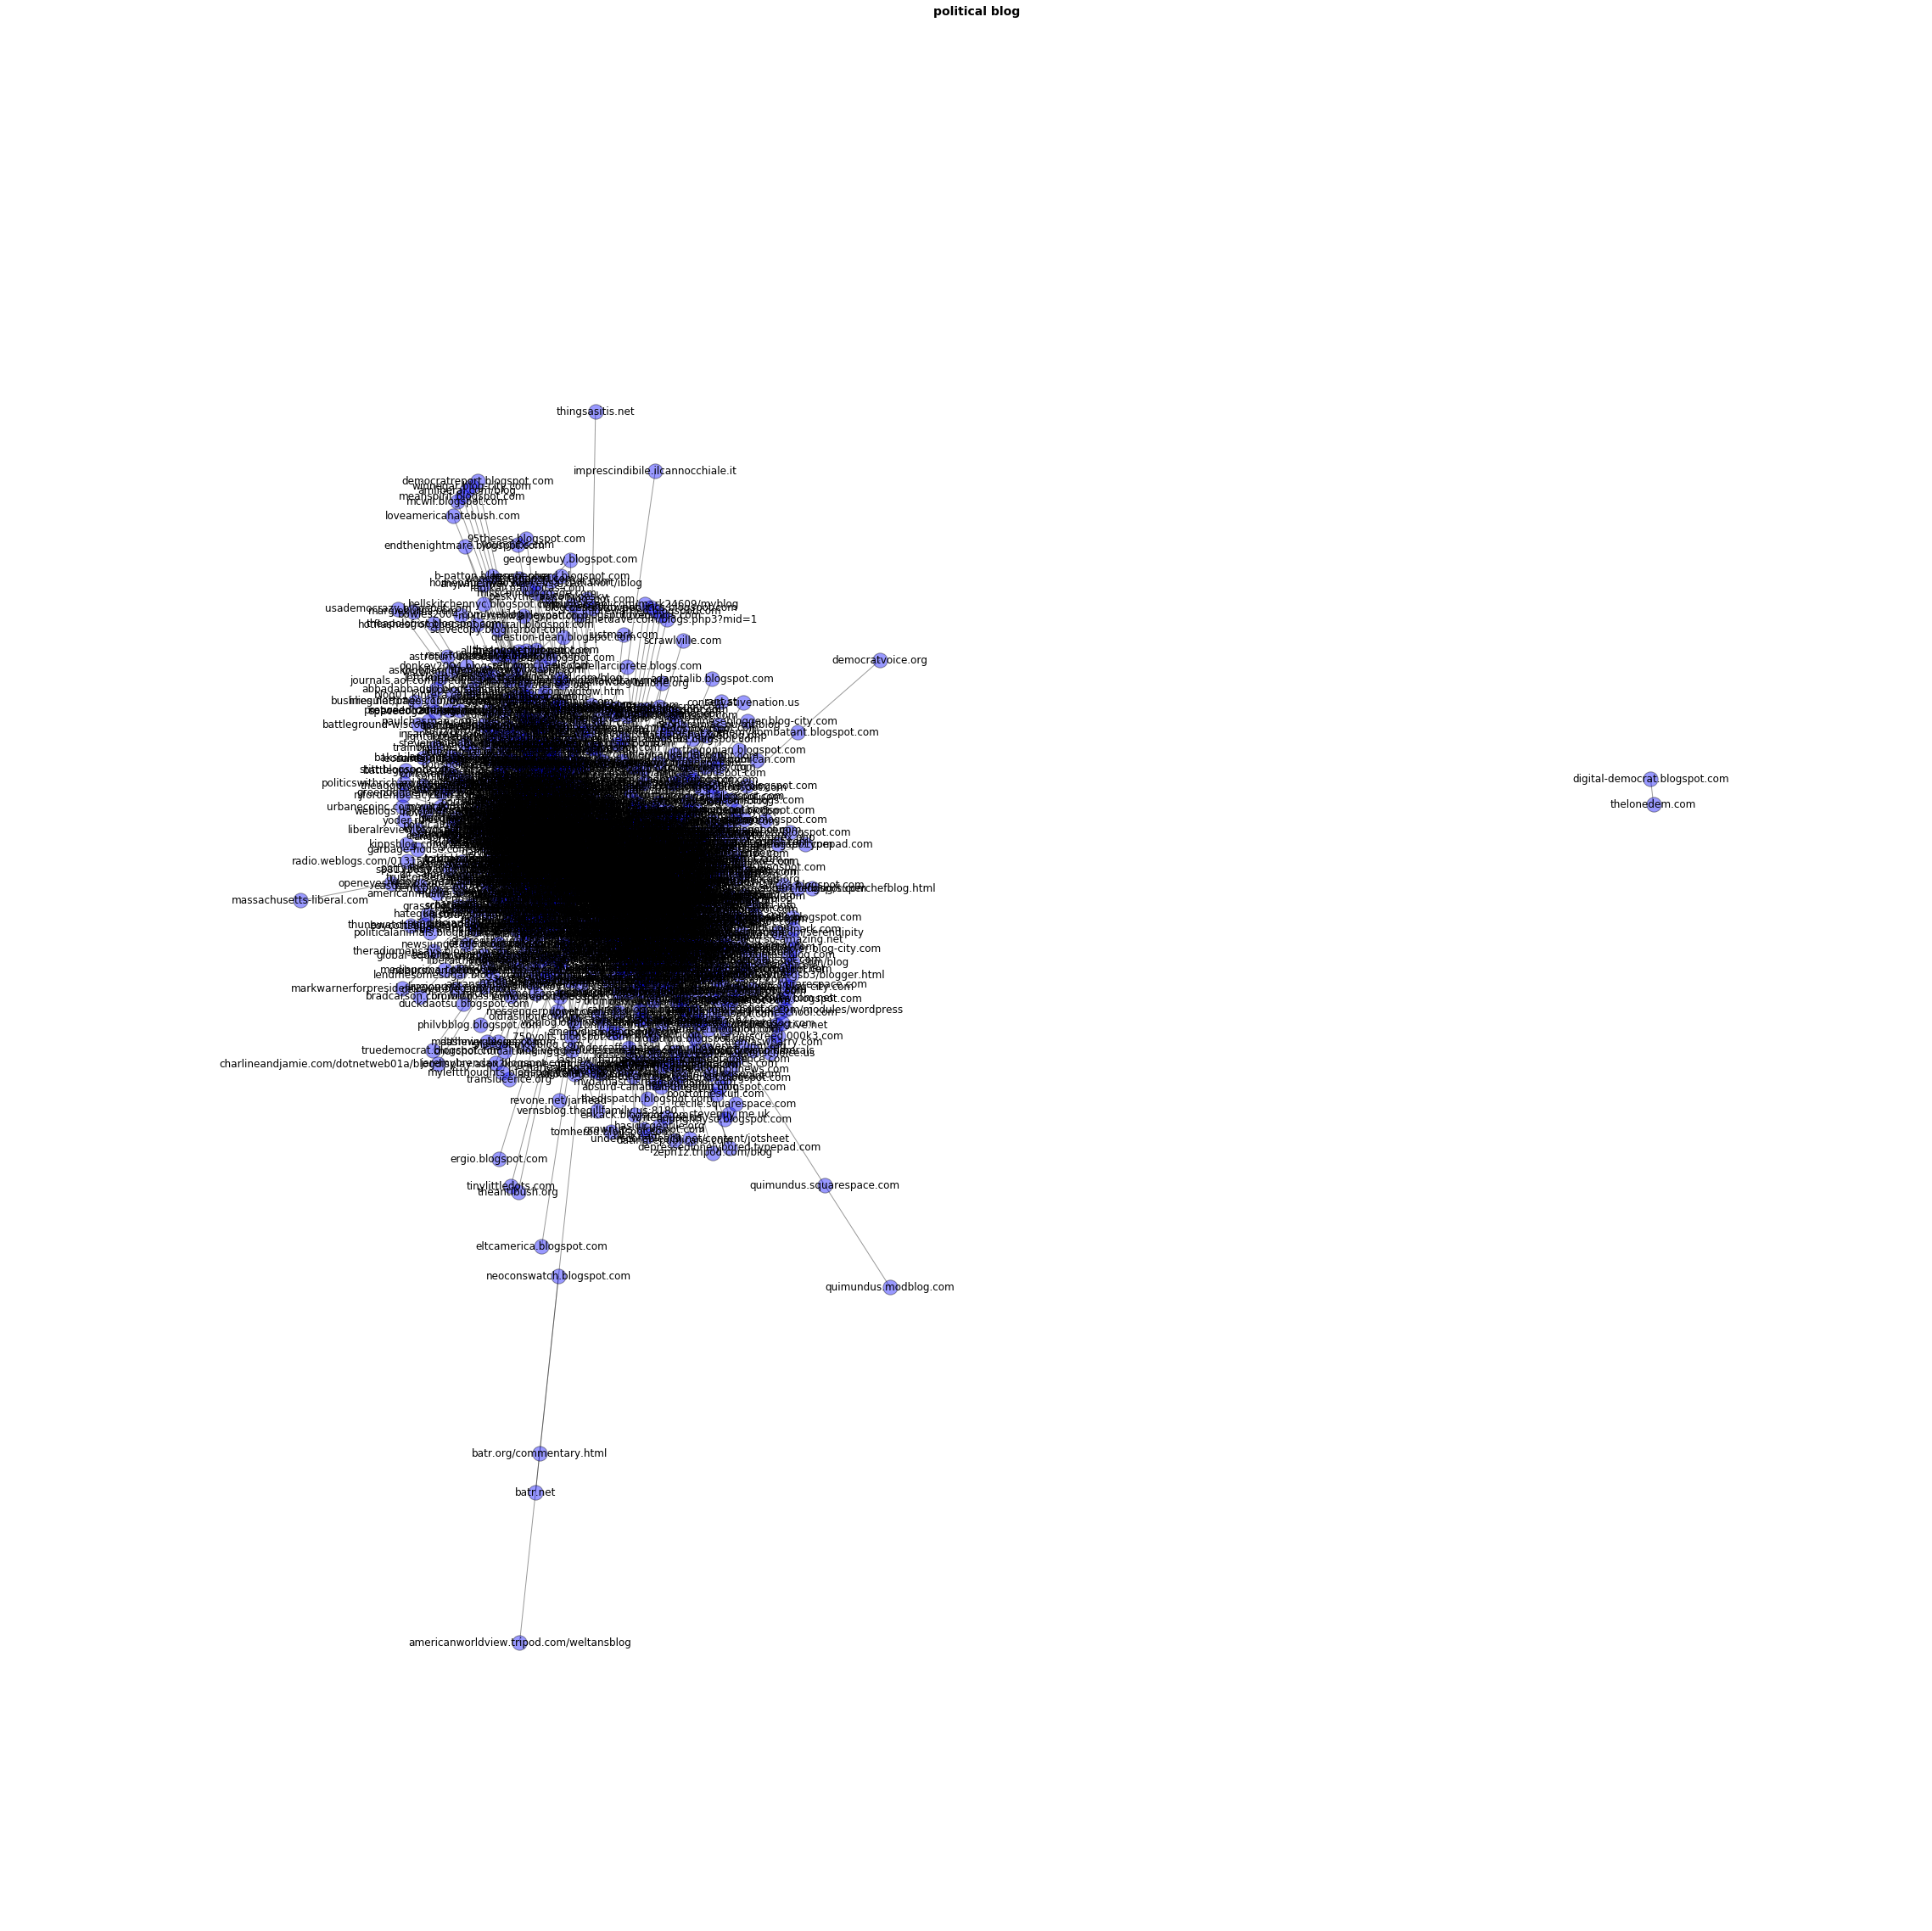

In [4]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("political blog", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [5]:
# write the graph into a gexf file for use in Gephi
nx.write_gexf(G,'political_blog.gexf')

### 2.  What are the 10 most influential blogs?

In [7]:
centrality=nx.eigenvector_centrality(G)

In [8]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [9]:
most = sorted(blog_list, key=lambda x: x[1], reverse=True)

In [21]:
print 'The 10 most influential blogs are ==> ', [x[0] for x in most[0:10]]

The 10 most influential blogs are ==>  [u'atrios.blogspot.com', u'dailykos.com', u'washingtonmonthly.com', u'digbysblog.blogspot.com', u'bodyandsoul.typepad.com', u'liberaloasis.com', u'tbogg.blogspot.com', u'corrente.blogspot.com', u'talkingpointsmemo.com', u'dneiwert.blogspot.com']


### 3.  What are the 10 least influential blogs?



In [22]:
least = sorted(blog_list, key=lambda x: x[1], reverse=False)

In [23]:
print 'The 10 least influential blogs are ==> ', [x[0] for x in least[0:10]]

The 10 least influential blogs are ==>  [u'thelonedem.com', u'digital-democrat.blogspot.com', u'americanworldview.tripod.com/weltansblog', u'quimundus.modblog.com', u'batr.org/commentary.html', u'batr.net', u'democratvoice.org', u'quimundus.squarespace.com', u'massachusetts-liberal.com', u'thingsasitis.net']


### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [24]:
# 0 means left or liberal, 1 means right or conservative. We loop through the most and least influential list
# that was created earliers, and bifurcate them into left/right + least/most variables.
most_L = []
least_L = []
most_R = []
least_R = []
for (u, v) in most:
    val = M.node.get(u)['value']
    if val == 0:
        most_L.append(u)
    elif val == 1:
        most_R.append(u)
        
for (u, v) in least:
    val = M.node.get(u)['value']
    if val == 0:
        least_L.append(u)
    elif val == 1:
        least_R.append(u)

In [25]:
print '10 most influential Left Wing blogs ==> ', most_L[0:10]

10 most influential Left Wing blogs ==>  [u'atrios.blogspot.com', u'dailykos.com', u'washingtonmonthly.com', u'digbysblog.blogspot.com', u'bodyandsoul.typepad.com', u'liberaloasis.com', u'tbogg.blogspot.com', u'corrente.blogspot.com', u'talkingpointsmemo.com', u'dneiwert.blogspot.com']


In [26]:
# check for correctness by checking the value of 1st and 10th blog (should be equal to 0 indicating left)
M.node.get(most_L[0])

{u'source': u'BlogPulse,LeftyDirectory,CampaignLine', u'value': 0}

In [27]:
M.node.get(most_L[9])

{u'source': u'LeftyDirectory,eTalkingHead', u'value': 0}

In [28]:
print "10 most influential Right Wing blogs ==> ", most_R[0:10]

10 most influential Right Wing blogs ==>  [u'instapundit.com', u'vodkapundit.com', u'hughhewitt.com', u'powerlineblog.com', u'michellemalkin.com', u'blogsforbush.com', u'outsidethebeltway.com', u'balloon-juice.com', u'wizbangblog.com', u'volokh.com']


In [29]:
# check for correctness by checking the value of 1st and 10th blog (should be equal to 1 indicating right)
M.node.get(most_R[0])

{u'source': u'BlogPulse', u'value': 1}

In [30]:
M.node.get(most_R[9])

{u'source': u'LabeledManually', u'value': 1}

In [31]:
print "10 least influential Left Wing blogs ==> ", least_L[0:10]

10 least influential Left Wing blogs ==>  [u'thelonedem.com', u'digital-democrat.blogspot.com', u'democratvoice.org', u'massachusetts-liberal.com', u'thingsasitis.net', u'loveamericahatebush.com', u'eltcamerica.blogspot.com', u'usademocrazy.blogspot.com', u'margieburns.com', u'endthenightmare.blogspot.com']


In [32]:
# check for correctness by checking the value of 1st and 10th blog (should be equal to 0 indicating left)
M.node.get(least_L[0])

{u'source': u'Blogarama', u'value': 0}

In [33]:
M.node.get(least_L[9])

{u'source': u'Blogarama,eTalkingHead', u'value': 0}

In [34]:
print "10 least influential Right Wing blogs ==> ", least_R[0:10]

10 least influential Right Wing blogs ==>  [u'americanworldview.tripod.com/weltansblog', u'quimundus.modblog.com', u'batr.org/commentary.html', u'batr.net', u'quimundus.squarespace.com', u'imprescindibile.ilcannocchiale.it', u'depressedlonelybored.typepad.com', u'zeke01.blogspot.com', u'zeph1z.tripod.com/blog', u'neoconswatch.blogspot.com']


In [35]:
# check for correctness by checking the value of 1st and 10th blog (should be equal to 1 indicating right)
M.node.get(least_R[0])

{u'source': u'Blogarama', u'value': 1}

In [36]:
M.node.get(least_R[9])

{u'source': u'Blogarama', u'value': 1}